# 911 Calls Capstone Project - Solutions

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()
# or len(df['title'].unique())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [10]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

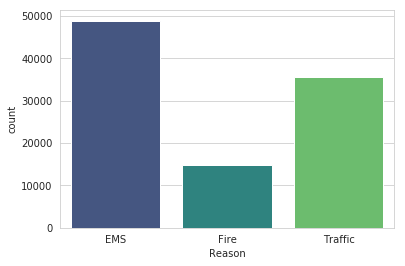

In [12]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [13]:
df.info()
# tell you that timeStamp is an object, not a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [14]:
# look at an example
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [15]:
# find the type of it, its a str 
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
type(df['timeStamp'].iloc[0])
# now we have a timestep object

pandas._libs.tslibs.timestamps.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [18]:
# look at an example
time = df['timeStamp'].iloc[0]

# use time. and press Tab to see what function i can use
# here i use .month, .hour, .dayofweek they returns an integer
print('time:',time)
print('time.year:',time.year)
print('time.month:',time.month)
print('time.day:',time.day)
print('time.hour:',time.hour)
print('time.minute:',time.minute)
print('time.second:',time.second)
print('time.dayofweek:',time.dayofweek)
print('time.date():',time.date())
print('type(time):',type(time))
print('type(time.date()):',type(time.date()))
print('type(time.hour):',type(time.hour))
# 

time: 2015-12-10 17:40:00
time.year: 2015
time.month: 12
time.day: 10
time.hour: 17
time.minute: 40
time.second: 0
time.dayofweek: 3
time.date(): 2015-12-10
type(time): <class 'pandas._libs.tslibs.timestamps.Timestamp'>
type(time.date()): <class 'datetime.date'>
type(time.hour): <class 'int'>


In [19]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,3
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,3
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,3
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,3


In [20]:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=0
# https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6
# use my original method, ~ 180 ms
%timeit df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

179 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
# use this method, take only 2 ms !!!!!
# or convert pandas series to numpy series using .values and do the trick
#%timeit df['Day of Week'] = df['timeStamp'].dt.dayofweek
df['timeStamp'].dt.date.head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: timeStamp, dtype: object

In [22]:
# what is df['timeStamp'].dt ?
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html
# use .dt to access date time information
df['timeStamp'].dt

In [23]:
#https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.dt.date.html
#array of date
df['timeStamp'].dt.date

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


In [24]:
type(df['timeStamp'].dt.date)
# its a pandas series

pandas.core.series.Series

In [25]:
# if i use .values
df['timeStamp'].dt.date.values

array([datetime.date(2015, 12, 10), datetime.date(2015, 12, 10),
       datetime.date(2015, 12, 10), ..., datetime.date(2016, 8, 24),
       datetime.date(2016, 8, 24), datetime.date(2016, 8, 24)],
      dtype=object)

In [26]:
# i can get a numpy array
type(df['timeStamp'].dt.date.values)

numpy.ndarray

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
# combines pandas and a dictionary
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
df['Day of Week'] = df['Day of Week'].map(dmap)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,Thu
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,Thu
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,Thu
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

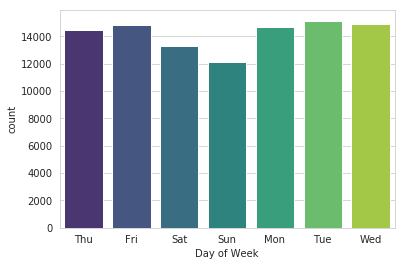

In [29]:
# without hue
sns.countplot(x='Day of Week',data=df,palette='viridis')

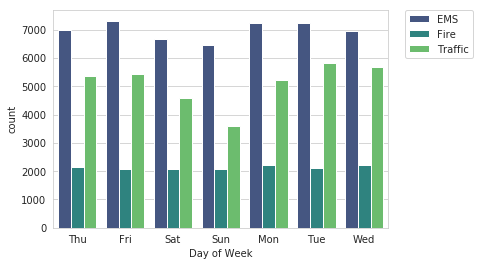

In [30]:
# with hue
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now do the same for Month:**

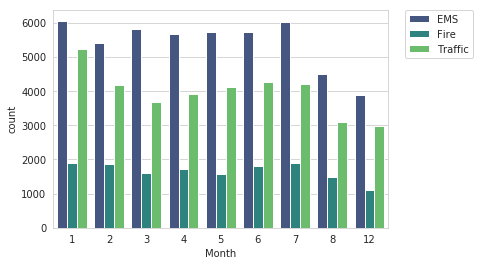

In [31]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Did you notice something strange about the Plot? **

In [32]:
# It is missing some months! 9,10, and 11 are not there.
# we can plot the information in another way
# maybe we can plot a line plot which take that missing month
# into account

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [33]:
byMonth = df.groupby('Month').count()
byMonth.head()
# some numbers are different because something is missing when
# groupby month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

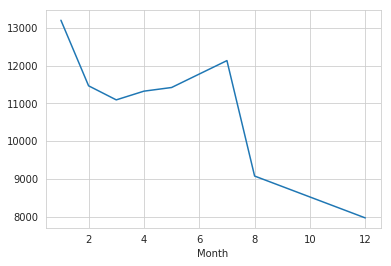

In [34]:
# Could be any column
byMonth['twp'].plot()
# now we can fit in some of the missig month
# this plot is better than bar plot

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [35]:
# its just counts so y can be twp, lat or ...
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [36]:
# if we rest_index, we make a new column of month that let seaborn
# to access this information.
#
# reset_index() : 
# For DataFrame with multi-level index, return new DataFrame with
# labeling information in the columns under the index names,
# so we can access this column later lm lmplot
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


/home/jun-chieh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


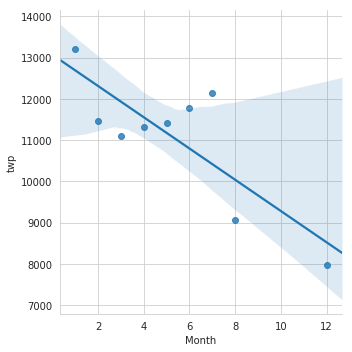

In [37]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index()) 
# seaborn doesnt have enough information to realize that 
# it is by month, so 13 and 14 shouldnt exist, and in this case
# the linear model isn't a perfect fit, and you can see that seaborn
# show this shaded area indicating the error, and the error
# grows, which makes sense because you don't have data points 
# for 9, 10, and 11, its something we can explore later 

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [38]:
# look at the first instance of timestamp
# =>
# Timestamp('2015-12-10 17:40:00') is a timestamp object,
# its different from a date object
t = df['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:40:00')

In [39]:
# if we call 
# datetime.date(2015, 12, 10) now we get a date object, no longer
# have a time information
t.date()

datetime.date(2015, 12, 10)

In [40]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())
df.head()
# now we have date column

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [41]:
df.groupby('Date').count()
# data starts from 2015/12 to 2016/08, thats why there are not too many calls
# during 9, 10, 11
# also see here https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056
# (use strftime)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


In [42]:
df.groupby('Date').count()['twp'].head()

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
Name: twp, dtype: int64

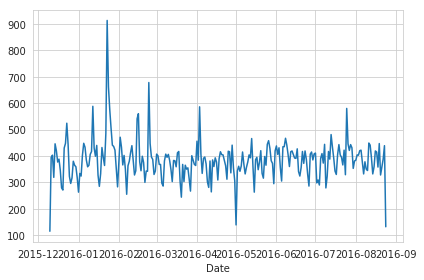

In [43]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

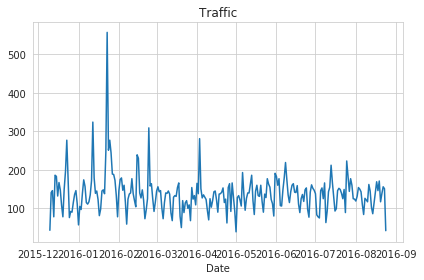

In [44]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

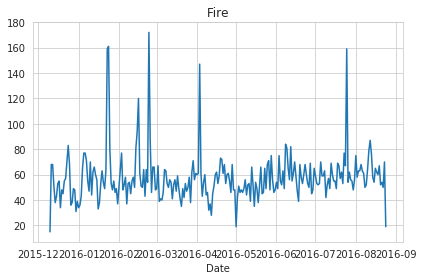

In [45]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

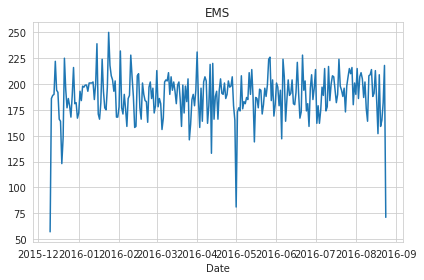

In [46]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

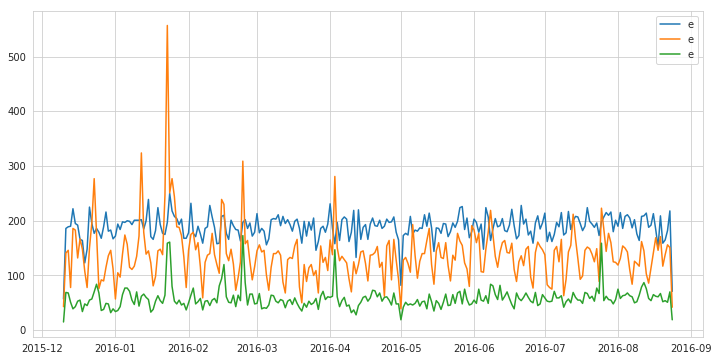

In [47]:
# 3 reasons in the same plot, but cannot see the reason !!
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056
plt.figure(figsize=(12,6))
plt.plot(df[df['Reason']=='EMS'].groupby('Date').count()['e'])
plt.plot(df[df['Reason']=='Traffic'].groupby('Date').count()['e'])
plt.plot(df[df['Reason']=='Fire'].groupby('Date').count()['e'])
plt.legend()

In [48]:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056
# use multi-level index to plot them together, seperate with hue 
# as_index=False so date and reason are not index, they are column instead !!
# so that we can use it later !!
calls=df.groupby(by=['Date','Reason'],as_index=False)['e'].count()
calls.head()

,Date,Reason,e
0,2015-12-10,EMS,57
1,2015-12-10,Fire,15
2,2015-12-10,Traffic,43
3,2015-12-11,EMS,186
4,2015-12-11,Fire,69


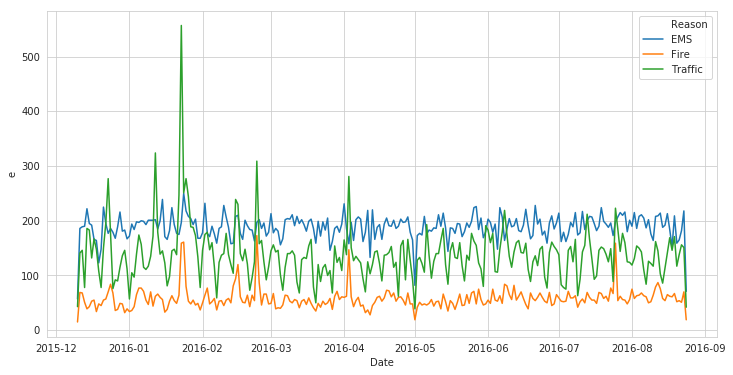

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(x=calls['Date'],y=calls['e'],hue=calls['Reason'])
# we can also use formatted dats
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056
# 

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [50]:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056
# groupby 'Day of Week' and 'Hour' and create a multi-level index
df.groupby(by=['Day of Week','Hour']).head()
#df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 18:02:01,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,18,12,Thu,2015-12-10
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1,Traffic,18,12,Thu,2015-12-10
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:02:02,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1,Traffic,18,12,Thu,2015-12-10
25,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: GENERAL WEAKNESS,2015-12-10 18:06:25,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,EMS,18,12,Thu,2015-12-10
26,40.155283,-75.264230,PENLLYN BLUE BELL PIKE & VILLAGE CIR; WHITPAI...,19422.0,EMS: HEAD INJURY,2015-12-10 18:06:25,WHITPAIN,PENLLYN BLUE BELL PIKE & VILLAGE CIR,1,EMS,18,12,Thu,2015-12-10


In [51]:
df.groupby(by=['Day of Week','Hour']).count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201

In [52]:
# if i want to sort the day:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056
# without sort :
df.groupby(by=['Day of Week']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
Day of Week,,,,,,,,,,,,,
Fri,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833,14833
Mon,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680,14680
Sat,13336,13336,13336,11612,13336,13336,13330,13234,13336,13336,13336,13336,13336
Sun,12136,12136,12136,10558,12136,12136,12130,12095,12136,12136,12136,12136,12136
Thu,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478,14478
Tue,15150,15150,15150,13207,15150,15150,15143,15057,15150,15150,15150,15150,15150
Wed,14879,14879,14879,13030,14879,14879,14868,14794,14879,14879,14879,14879,14879


In [53]:
# with sort:
df.groupby(by=['Day of Week']).count().reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
Day of Week,,,,,,,,,,,,,
Mon,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680,14680
Tue,15150,15150,15150,13207,15150,15150,15143,15057,15150,15150,15150,15150,15150
Wed,14879,14879,14879,13030,14879,14879,14868,14794,14879,14879,14879,14879,14879
Thu,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478,14478
Fri,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833,14833
Sat,13336,13336,13336,11612,13336,13336,13330,13234,13336,13336,13336,13336,13336
Sun,12136,12136,12136,10558,12136,12136,12130,12095,12136,12136,12136,12136,12136


In [54]:
df.groupby(by=['Day of Week','Hour']).count()['Reason'].head()

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
Name: Reason, dtype: int64

In [55]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [56]:
# we can use pivot too
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733402?start=1056

** Now create a HeatMap using this new DataFrame. **

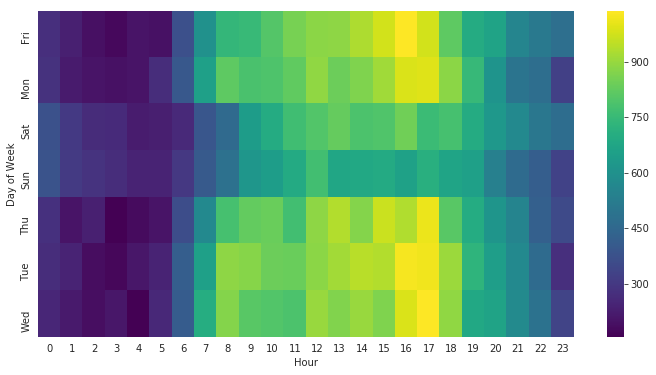

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# not too many calls during 0 ~ 5 because people are sleeping
#                    on sunday and saturday 

** Now create a clustermap using this DataFrame. **

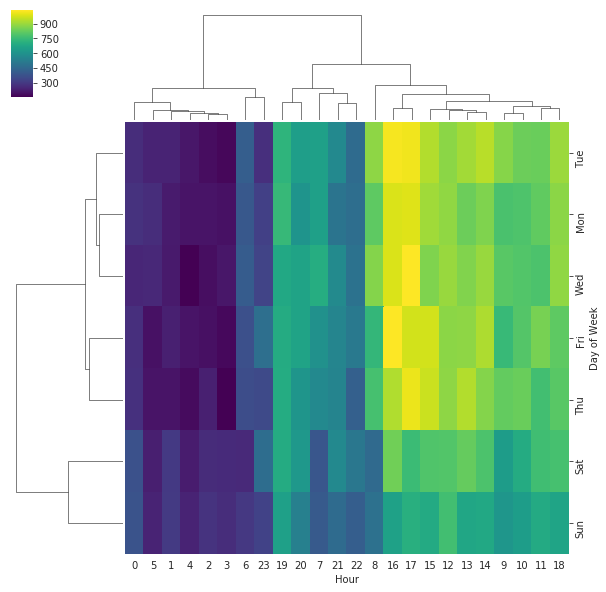

In [58]:
sns.clustermap(dayHour,cmap='viridis')

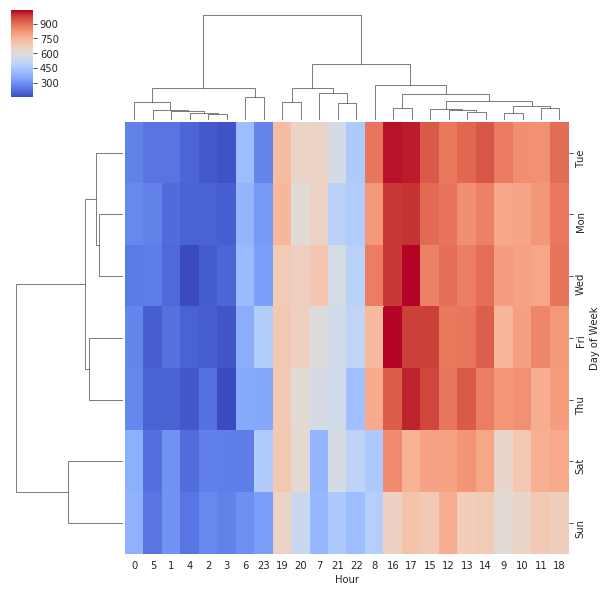

In [59]:
# sometimes it easier to see with cmap=coolwarm
sns.clustermap(dayHour,cmap='coolwarm')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [60]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


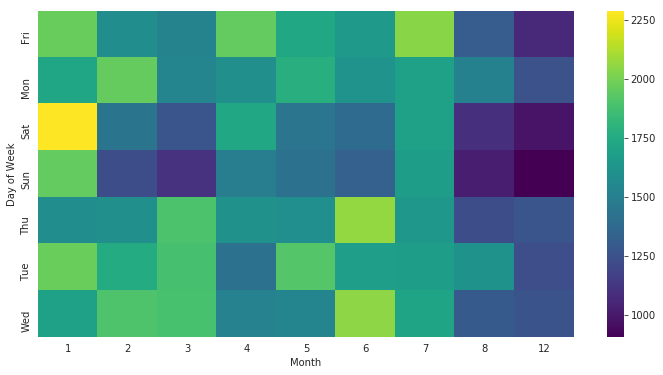

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

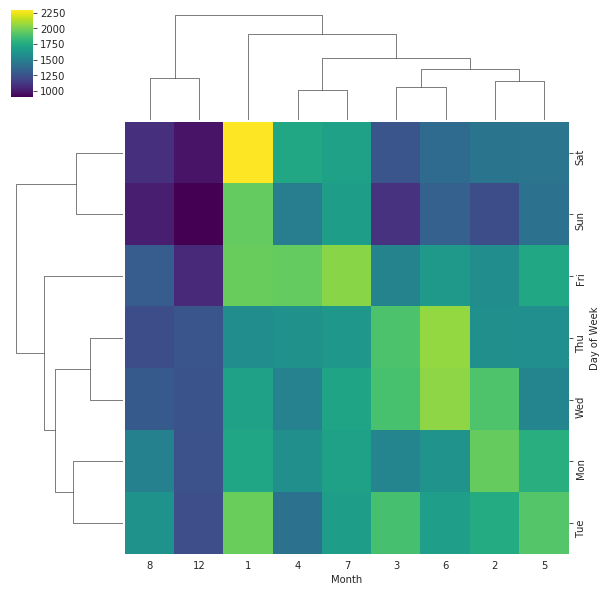

In [62]:
sns.clustermap(dayMonth,cmap='viridis')

**Continue exploring the Data however you see fit!**
# Great Job!